In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")
%matplotlib inline

from boostaroota import BoostARoota
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.decomposition import PCA
import xgboost as xgb

In [2]:
data = pd.read_csv('../data/data_numerical.csv')
data_2017 = data[data.Season == 2017]

#data_leave = data[data.Leave == 1]
#data_no_retire = data_leave[data_leave.target != 30]
#data = data_no_retire

In [3]:
data.head()

,RP,C,SP,FD,Avg_Team_G,Avg_Team_Career_Length,Avg_Team_Stay_Length,Player_Trade_Freq,target,Career_Length,Stay_Length,GS,Inn,playerid,G,Team,Season,Leave
0,0,0,0,1,103.666667,1.703704,1.666667,0.000000,0,1,1,0,287.1,1,74,0,2003,0.0
1,0,0,0,1,105.280000,2.560000,2.120000,0.000000,13,2,2,0,167.0,1,73,0,2004,1.0
2,0,0,0,1,112.086957,2.086957,1.434783,0.500000,13,3,1,0,656.0,1,264,13,2006,0.0
3,0,0,0,1,97.080000,2.680000,1.880000,0.333333,13,4,2,0,765.2,1,266,13,2007,0.0
4,0,0,0,1,118.173913,3.304348,2.000000,0.250000,13,5,3,0,655.2,1,375,13,2008,0.0


In [4]:
X = data.drop(['Leave', 'target'], axis=1)
X.drop(data[data.Season==2017].index, inplace=True)
y = data['Leave']
y.drop(data[data.Season==2017].index, inplace=True)
u = data['target']
u.drop(data[data.Season==2017].index, inplace=True)

In [5]:
X.head()

,RP,C,SP,FD,Avg_Team_G,Avg_Team_Career_Length,Avg_Team_Stay_Length,Player_Trade_Freq,Career_Length,Stay_Length,GS,Inn,playerid,G,Team,Season
0,0,0,0,1,103.666667,1.703704,1.666667,0.000000,1,1,0,287.1,1,74,0,2003
1,0,0,0,1,105.280000,2.560000,2.120000,0.000000,2,2,0,167.0,1,73,0,2004
2,0,0,0,1,112.086957,2.086957,1.434783,0.500000,3,1,0,656.0,1,264,13,2006
3,0,0,0,1,97.080000,2.680000,1.880000,0.333333,4,2,0,765.2,1,266,13,2007
4,0,0,0,1,118.173913,3.304348,2.000000,0.250000,5,3,0,655.2,1,375,13,2008


In [6]:
y1, y2 = 2015, 2016
#y1, y2 = np.random.randint(2006, high=1+2016, size=2)
print(y1, y2)
train_mask = (X.Season > 2004)&(X.Season != y1)&(X.Season != y2)
test_mask = (X.Season == y1)|(X.Season == y2)
X_train = X[train_mask]
X_test = X[test_mask]
y_train =y[train_mask]
y_test = y[test_mask]
u_train = u[train_mask]
u_test = u[test_mask]


2015 2016


In [7]:
#pca = PCA(n_components=15)
#pca.fit(X_train)
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)

In [8]:
xmodel = xgb.XGBClassifier()
xmodel.fit(X_train, y_train)
xmodel.score(X_test, y_test)

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7032348804500703

In [9]:
bmodel = BoostARoota(metric='logloss')
bmodel.fit(X_train, y_train)
bmodel.keep_vars_
#X_train = bmodel.transform(X_train)
#X_test = bmodel.transform(X_test)

Round:  1  iteration:  1
Round:  1  iteration:  2
Round:  1  iteration:  3
Round:  1  iteration:  4
Round:  1  iteration:  5
Round:  1  iteration:  6
Round:  1  iteration:  7
Round:  1  iteration:  8
Round:  1  iteration:  9
Round:  1  iteration:  10
Round:  2  iteration:  1
Round:  2  iteration:  2
Round:  2  iteration:  3
Round:  2  iteration:  4
Round:  2  iteration:  5
Round:  2  iteration:  6
Round:  2  iteration:  7
Round:  2  iteration:  8
Round:  2  iteration:  9
Round:  2  iteration:  10
BoostARoota ran successfully! Algorithm went through  2  rounds.


0                 Avg_Team_G
1     Avg_Team_Career_Length
2       Avg_Team_Stay_Length
3          Player_Trade_Freq
4              Career_Length
5                Stay_Length
6                         GS
7                        Inn
8                   playerid
9                          G
10                      Team
11                    Season
Name: feature, dtype: object

In [10]:
xmodel = xgb.XGBClassifier()
xmodel.fit(X_train, y_train)
xmodel.score(X_test, y_test)

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7032348804500703

In [11]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
et.score(X_test, y_test)

0.6434599156118144

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.6870604781997187

In [13]:
leave_predictions_train = xmodel.predict(X_train)
leave_predictions_test = xmodel.predict(X_test)

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Multi model stuff

In [14]:
#data_multi = pd.read_csv('../data/hayden_cleaned_data.csv')

In [15]:
#team_names = data_multi.target.unique()
#id_team = {names:i for i,names in enumerate (team_names)}
#data_multi.target = data_multi.target.apply(lambda x : id_team[x])

In [16]:
#X = data.drop(['Leave', 'playerid','Team'], axis=1)
#X.drop(data[data.Season==2017].index, inplace=True)
#u = data['Team']
#u.drop(data[data.Season==2017].index, inplace=True)

In [17]:
X_train['Leave_pred'] = leave_predictions_train
X_test['Leave_pred'] = leave_predictions_test


In [18]:
bmodel = BoostARoota(metric='logloss')
bmodel.fit(X_train, u_train)
X_train = bmodel.transform(X_train)
X_test = bmodel.transform(X_test)
bmodel.keep_vars_

Round:  1  iteration:  1
Round:  1  iteration:  2
Round:  1  iteration:  3
Round:  1  iteration:  4
Round:  1  iteration:  5
Round:  1  iteration:  6
Round:  1  iteration:  7
Round:  1  iteration:  8
Round:  1  iteration:  9
Round:  1  iteration:  10
Round:  2  iteration:  1
Round:  2  iteration:  2
Round:  2  iteration:  3
Round:  2  iteration:  4
Round:  2  iteration:  5
Round:  2  iteration:  6
Round:  2  iteration:  7
Round:  2  iteration:  8
Round:  2  iteration:  9
Round:  2  iteration:  10
BoostARoota ran successfully! Algorithm went through  2  rounds.


1                 Avg_Team_G
2     Avg_Team_Career_Length
3       Avg_Team_Stay_Length
4          Player_Trade_Freq
5              Career_Length
6                Stay_Length
7                         GS
8                        Inn
9                   playerid
10                         G
11                      Team
12                    Season
13                Leave_pred
Name: feature, dtype: object

In [19]:
X_train.head()

,Avg_Team_G,Avg_Team_Career_Length,Avg_Team_Stay_Length,Player_Trade_Freq,Career_Length,Stay_Length,GS,Inn,playerid,G,Team,Season,Leave_pred
2,112.086957,2.086957,1.434783,0.500000,3,1,0,656.0,1,264,13,2006,0.0
3,97.080000,2.680000,1.880000,0.333333,4,2,0,765.2,1,266,13,2007,1.0
4,118.173913,3.304348,2.000000,0.250000,5,3,0,655.2,1,375,13,2008,0.0
5,105.958333,2.958333,2.041667,0.200000,6,4,0,81.1,1,27,13,2009,1.0
9,121.000000,3.208333,2.458333,0.000000,4,4,0,920.0,2,142,0,2005,0.0


In [20]:
#from keras.utils import np_utils

In [21]:
#mask_retire = (data.target == 0)
#data_noretire = data[~mask_retire]
#mask_gs = (data.G >= 1)
#data_noretire = (data[mask_gs])
#mask_length = (data_leave.Stay_Length >= 2)
#data_noretire = (data_leave[mask_length])
#data_noretire

In [22]:
#X = data[['SP','RP','FD','C','Stay_Length', 'Career_Length', 'GS', 'G', 'Inn']]#list(p.Team.unique())+


#y = data[['Diamondbacks','Royals','Dodgers','Phillies','Brewers','Cubs','Tigers','Giants','Red Sox','Indians','Twins','Blue Jays','White Sox','Padres','Cardinals','Mets','Braves','Expos','Rockies','Marlins','Astros','Nationals','Yankees','Mariners','Angels','Athletics','Reds','Pirates','Rays','Orioles','Rangers','Devil Rays']]
#y = np_utils.to_categorical(data_noretire.target,33)
#u = data_noretire.target 

In [23]:
et = ExtraTreesClassifier()
et.fit(X_train, u_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
et.score(X_test, u_test)

0.37834036568213786

In [25]:
xmodel = xgb.XGBClassifier()
xmodel.fit(X_train, u_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [26]:
xmodel.score(X_test, u_test)

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6033755274261603

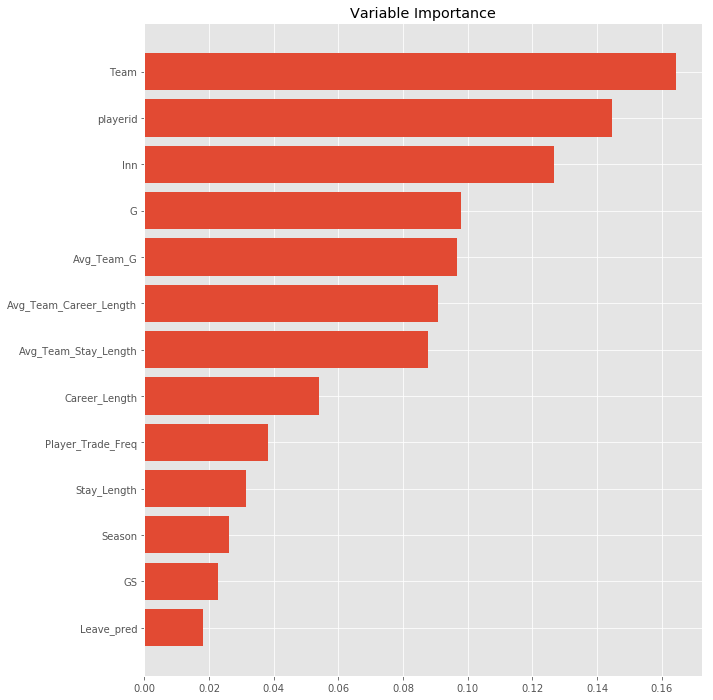

In [27]:
ind = np.argsort(xmodel.feature_importances_)
plt.figure(figsize=(10,12))

plt.barh(range(len(xmodel.feature_importances_)),xmodel.feature_importances_[ind])
# It is very important that you use the same columns that you fit your model with, or else this will be wrong!
plt.yticks(range(len(xmodel.feature_importances_)),X_train.columns[ind])
plt.title("Variable Importance")
plt.show()

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, u_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
logreg.score(X_test, u_test)

0.29043600562587907

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, u_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
rf.score(X_test, u_test)

0.33263009845288327

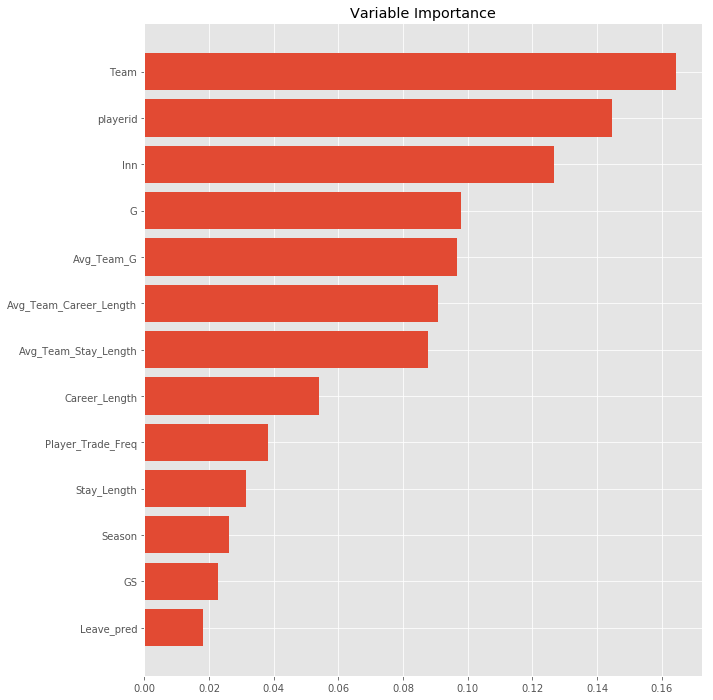

In [32]:
ind = np.argsort(xmodel.feature_importances_)
plt.figure(figsize=(10,12))

plt.barh(range(len(xmodel.feature_importances_)),xmodel.feature_importances_[ind])
# It is very important that you use the same columns that you fit your model with, or else this will be wrong!
plt.yticks(range(len(xmodel.feature_importances_)),X_train.columns[ind])
plt.title("Variable Importance")
plt.show()

In [33]:
Counter(xmodel.predict(X_test))

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Counter({0: 36,
         1: 38,
         2: 35,
         3: 40,
         4: 24,
         5: 39,
         6: 46,
         7: 25,
         8: 39,
         9: 37,
         10: 33,
         11: 34,
         12: 41,
         13: 14,
         14: 40,
         15: 42,
         16: 42,
         17: 35,
         18: 28,
         19: 34,
         20: 32,
         21: 37,
         22: 32,
         23: 36,
         24: 37,
         25: 34,
         26: 37,
         27: 39,
         28: 32,
         29: 30,
         30: 374})

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


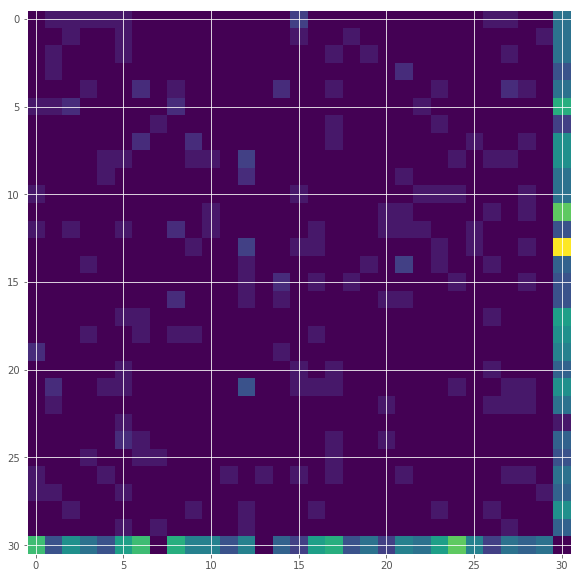

In [34]:
plt.figure(figsize=(10,10))
conf_mat = confusion_matrix(u_test, xmodel.predict(X_test))
ind = np.diag_indices(len(conf_mat))
conf_mat[ind] = 0
plt.imshow(conf_mat)
plt.show()

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


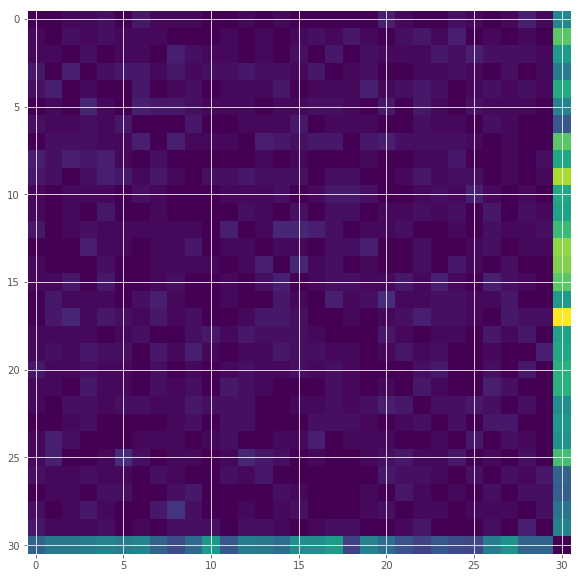

In [35]:
plt.figure(figsize=(10,10))
conf_mat = confusion_matrix(u_train, xmodel.predict(X_train))
ind = np.diag_indices(len(conf_mat))
conf_mat[ind] = 0
plt.imshow(conf_mat)
plt.show()